# 4.9.2: Intro to Data Visualization with Python

## Import data and libraries

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy

### Import Data Files

In [2]:
# Data path
import os

path = os.path.join('/Users/samuellal/Downloads', '07-2024 Instacart Basket Analysis')

In [7]:
import pandas as pd

# Load the df_final_dataframe from the pickle file

df_final_dataframe = pd.read_pickle('/Users/samuellal/Downloads/07-2024 Instacart Basket Analysis/02 Data/Prepared Data/dataframe_exercise_4_9.pkl')


In [9]:
df_final_dataframe.shape

(32404859, 30)

In [10]:
df_final_dataframe.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2           1  Chocolate Sandwich Cookies        61             19     5.8   
3           1  Chocolate Sandwich Cookies        61             19     5.8   
4           1  Chocolate Sandwich Cookies        61             19     5.8   

   order_id user_id  order_number  orders_day_of_week  order_hour_of_day  ...  \
0   3139998     138            28                   6                 11  ...   
1   1977647     138            30                   6                 17  ...   
2    389851     709             2                   0                 21  ...   
3    652770     764             1                   3                 13  ...   
4   1813452     764             3                   4                 17  ...   

   First Name  Surnam  Gender      STATE  Age date_joined  n_dependants  \
0     Charles     Cox    Male  Minnesota   81    8/1/2019             1   
1     Charles     Cox    Male  Minnesota   81    8/1/2019             1   
2     Deborah   Glass  Female    Vermont   66   6/16/2018             2   
3     Heather   Myers  Female  Wisconsin   40    2/9/2020             3   
4     Heather   Myers  Female  Wisconsin   40    2/9/2020             3   

  fam_status  income merging_status  
0    married   49620           both  
1    married   49620           both  
2    married  158302           both  
3    married   31308           both  
4    married   31308           both  

[5 rows x 30 columns]

## Step 2. Creating a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

In [41]:
# Creating the Subset
df_final_dataframe.drop_duplicates(subset='user_id')['loyalty_flag'].value_counts()

loyalty_flag
New customer        112328
Regular customer     76864
Loyal customer       17017
Name: count, dtype: int64

<Axes: xlabel='prices', ylabel='prices'>

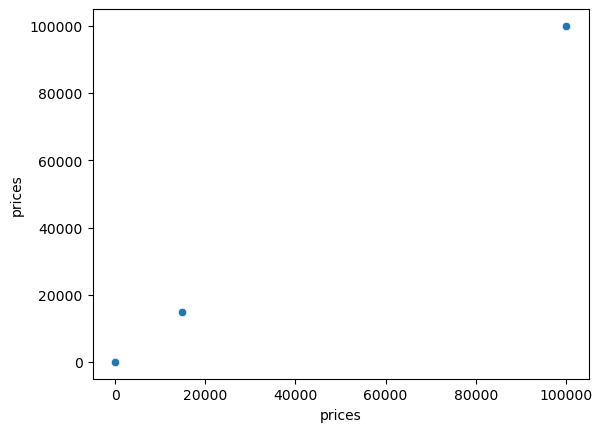

In [15]:
# Creating the ScatterPlot

sns.scatterplot(x = 'prices', y = 'prices',data = df_final_dataframe)

<Axes: xlabel='order_hour_of_day'>

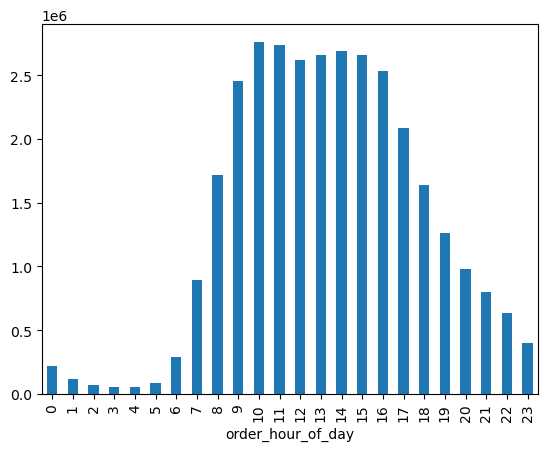

In [14]:
# Bar Chart

df_final_dataframe['order_hour_of_day'].value_counts().sort_index().plot.bar()


In [ ]:
# Step 1: Create the subset DataFrame with relevant columns
df_relevant_columns = df_final_dataframe[['order_hour_of_day', 'prices']]

# Step 2: Create the line chart using seaborn
import seaborn as sns
sns.lineplot(data=df_relevant_columns, x='order_hour_of_day', y='prices')


## Step 3. Creating a histogram of the “order_hour_of_day” column.

<Axes: ylabel='Frequency'>

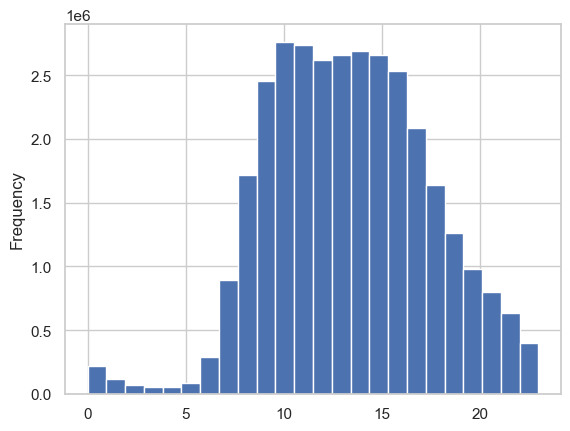

In [39]:
# Creating the Histogram

df_final_dataframe['order_hour_of_day'].plot.hist(bins = 24)

### 🕒 Distribution of Orders by Hour of Day

The histogram above visualizes the frequency of customer orders throughout the 24-hour day. Each bar represents the number of orders placed during a specific hour, based on the `order_hour_of_day` column from our dataset.

#### Key Observations:
- 📉 **Early Morning (0–6 AM):** Very few orders are placed during these hours, indicating low customer activity.
- 📈 **Late Morning to Early Afternoon (10 AM–2 PM):** This is the peak period for order volume, with the highest frequency of orders occurring around midday.
- 📉 **Evening Hours (6 PM onward):** Order activity gradually declines, suggesting customers are less likely to place orders later in the day.

#### Why This Matters:
Understanding when customers are most active helps us:
- Optimize staffing and logistics during peak hours.
- Schedule promotions or notifications when customers are most likely to engage.
- Improve delivery planning and inventory management.

This chart is a valuable tool for aligning operational strategies with customer behavior patterns.


## Step 4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

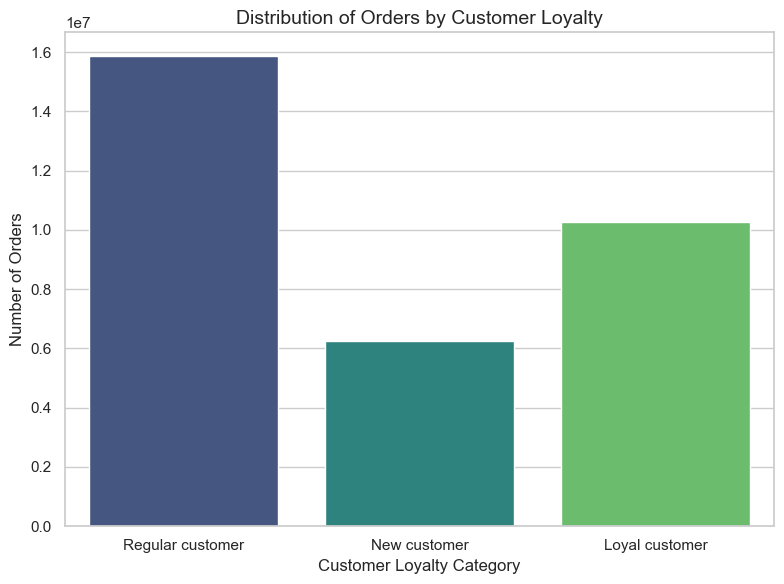

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df_final_dataframe, x='loyalty_flag', hue='loyalty_flag', palette='viridis', legend=False)


# Add titles and labels
plt.title('Distribution of Orders by Customer Loyalty', fontsize=14)
plt.xlabel('Customer Loyalty Category', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<Axes: xlabel='loyalty_flag'>

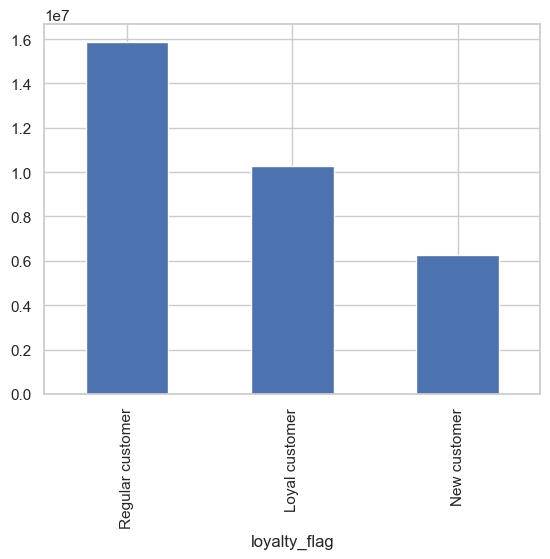

In [38]:
df_final_dataframe['loyalty_flag'].value_counts().plot.bar()

### 📊 Bar Chart: Distribution of Orders by Customer Loyalty

This bar chart visualizes how orders are distributed across different customer loyalty segments. The x-axis categorizes customers into **Regular**, **New**, and **Loyal**, while the y-axis shows the total number of orders placed by each group (scaled in tens of millions).

#### Key Insights:
- 🟦 **Regular Customers Dominate:** With approximately **16 million orders**, regular customers represent the largest share of activity.
- 🟨 **Loyal Customers Hold Strong:** Loyal customers contribute around **10 million orders**, indicating a solid base of repeat buyers.
- 🟥 **New Customers Trail Behind:** New customers account for roughly **6 million orders**, suggesting room for growth in acquisition or onboarding strategies.

#### Why This Matters:
Understanding how different loyalty segments behave helps:
- 📈 Target promotions to high-volume groups.
- 🎯 Design retention strategies for loyal customers.
- 🚀 Improve onboarding and engagement for new customers.

This chart offers a clear snapshot of customer loyalty dynamics and can guide marketing efforts to maximize impact.


# Step 5. Line Chart and Insights

In [24]:
# Sampling Data

np.random.seed(4)
dev = np.random.rand(len(df_final_dataframe)) <= 0.7

In [25]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [26]:
np. random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [28]:
# Store 70% of the Sample in the DataFrame Big

big = df_final_dataframe[dev]

# Store 30% of the Sample in the DataFrame Big

small = df_final_dataframe[~dev]

In [29]:
len(df_final_dataframe)

32404859

In [42]:
# Checking Output

len(big) + len(small)

32404859

In [43]:
# Storing the relevant columns in a variable

df_relevant_columns = small[['prices', 'order_hour_of_day']]

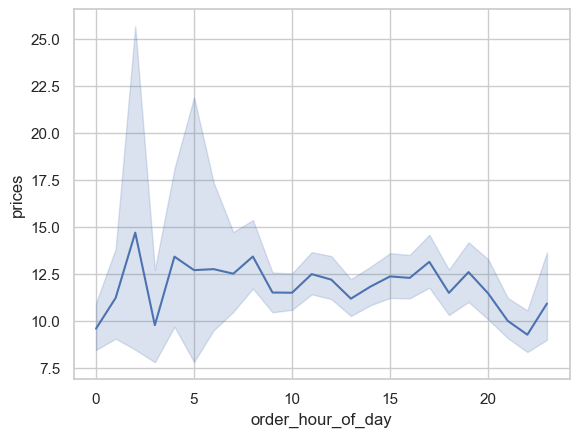

In [44]:
# Creating the line chart

line = sns.lineplot(data = df_relevant_columns, x = 'order_hour_of_day',y = 'prices')

### 📈 Line Chart: Prices Across Order Hours

This line chart illustrates how product prices vary depending on the hour of the day when orders are placed. The x-axis represents the `order_hour_of_day`, ranging from 0 (midnight) to 23 (11 PM), while the y-axis shows the corresponding `prices`.

#### Key Insights:
- 🌅 **Early Morning Spike:** There's a noticeable peak in prices during the early hours of the day, suggesting that higher-priced items may be ordered more frequently at that time.
- 📉 **Gradual Decline:** As the day progresses, the average price of ordered items tends to decrease.
- 📊 **Confidence Interval:** The shaded area around the line represents the confidence interval, giving us a sense of variability in pricing across different hours.

#### Why This Matters:
Understanding price trends by time of day can help:
- Tailor promotions to high-value hours.
- Adjust inventory or pricing strategies based on customer behavior.
- Identify patterns in premium product demand.

This visualization offers a clear snapshot of how customer spending fluctuates throughout the day.


## Step 6

#### Sampling

In [45]:
np.random.seed(4)

In [46]:
dev_1 = np.random.rand(len(df_final_dataframe)) <= 0.7

In [49]:
big_1 = df_final_dataframe[dev_1]

In [50]:
small_1 = df_final_dataframe[~dev_1]

In [51]:
# Checking output

len(big_1) + len(small_1)

32404859

In [58]:
# Storing the relevant columns in a new var

df_relevant_columns_1 = small_1[['Age', 'n_dependants']]



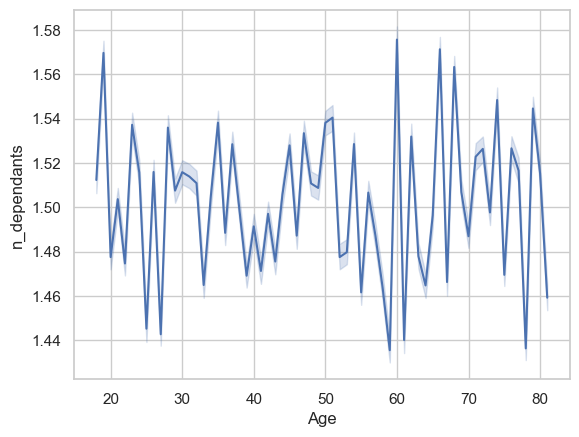

In [60]:
# Creating the line chart

line_2 = sns.lineplot(data=df_relevant_columns_1, x='Age', y='n_dependants')


### 📊 Line Chart Interpretation: Age vs. Number of Dependents

The line chart visualizes the relationship between **age** and **number of dependents** using Seaborn. Here's what it reveals:

- **X-axis (Age)**: Ranges from 0 to 80, representing the age of individuals.
- **Y-axis (Number of Dependents)**: Ranges from approximately 1.44 to 1.58, showing the average number of dependents per age group.
- **Trend**: The line fluctuates noticeably, suggesting that the number of dependents varies across different age groups rather than following a smooth upward or downward trend.

### 🧠 What This Means

- The variability could reflect different life stages—some age groups may be more likely to have children or other dependents, while others may not.
- The absence of a clear linear pattern implies that **age alone may not be a strong predictor** of family size, and other factors (like marital status, income, or cultural background) might play a role.

This insight can help refine targeted marketing strategies by identifying which age groups are more likely to have dependents and tailoring messaging accordingly.


## Step 7. Creating a scatterplot using the sns.scatterplot() function.

<Axes: xlabel='Age', ylabel='income'>

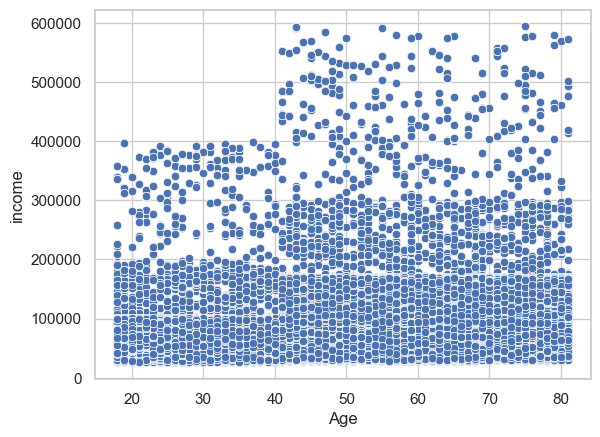

In [62]:
sns.scatterplot(x='Age', y='income', data=df_final_dataframe)


### 💸 Scatterplot Interpretation: Age vs. Income

This scatterplot visualizes the relationship between **Age** and **Income** using individual data points:

- **X-axis (Age)**: Spans from 0 to 80 years.
- **Y-axis (Income)**: Ranges from 0 to 600,000.
- **Data Points**: Each blue dot represents a customer, showing their age and corresponding income.

### 🔍 Observations

- Income values are widely dispersed across all age groups, indicating high variability.
- There is no clear linear trend, but some clustering may suggest that certain age ranges (e.g., 30–50) tend to have higher income levels.
- Younger individuals (under 25) and older individuals (over 65) appear to have lower income concentrations.

### 🧠 Implications

This visualization helps identify which age groups are more likely to have higher purchasing power. It can inform targeted marketing strategies by focusing on age segments with stronger income profiles.

Would you like to add a regression line or explore income by marital status next?


## Step 8. Export your visualizations as “.png” files in your relevant project folder.

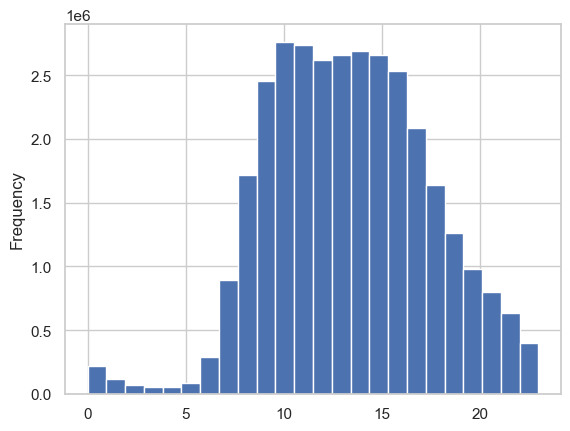

In [63]:
# Histogram

hist = df_final_dataframe['order_hour_of_day'].plot.hist(bins = 24)

In [64]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour_day.png'))

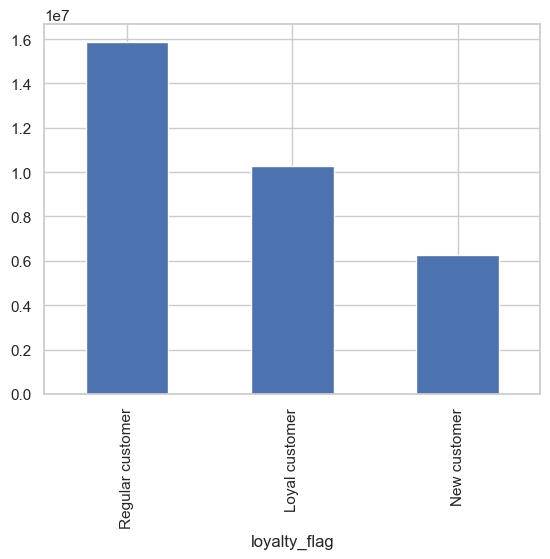

In [65]:
# Bar chart

bar = df_final_dataframe['loyalty_flag'].value_counts().plot.bar()

In [66]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_loyalty.png'))

In [67]:
# Line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_order_hour_day.png'))

In [68]:
# Line chart (step 6)

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

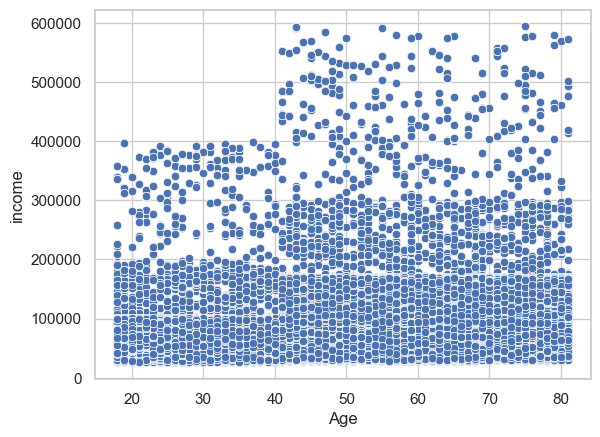

In [70]:
# Scatterplot

scat = sns.scatterplot(x='Age', y='income', data=df_final_dataframe)

In [ ]:
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))